## VisiumHD minor CF: bin2cell mismatch

### computer bin2cell

In [67]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from tqdm import tqdm
from revise.metrics import compute_metric


save_dir = "0_bin2cell_results"
sn = "Xenium"
patient_id = "P2CRC"
parts = ["part1", "part2", "part3"]
iterations=[0, 2]
spot_sizes = [20, 30, 40, 50]

for spot_size in tqdm(spot_sizes, desc="Spot size"):
    for part in tqdm(parts, desc="Part"):
        for iteration in tqdm(iterations, desc="Iteration"):
            result_dir=f"{save_dir}/{patient_id}/{part}/{iteration}/{spot_size}_1_1"
            bin2cell_adata = 
            os.makedirs(result_dir, exist_ok=True)
            input_dir = f"WSI_{sn}/{patient_id}/cut_{part}/{iteration}"
            spot_path = os.path.join(input_dir, f"spot_{spot_size}")
            
            st_path = f"{spot_path}/xenium_spot.h5ad"
            sc_path = f"{input_dir}/selected_xenium.h5ad"

            st_adata = sc.read(st_path)
            sc_adata = sc.read(sc_path)
            bin2cell_adata = sc.read(bin2cell_adata)
            
            gene_names = bin2cell_adata.var_names.intersection(sc_adata.var_names)
            sc_list = bin2cell_adata.obs['cell_id'].values
            sc_adata.obs.index = sc_adata.obs['cell_id'].values
            sc_adata = sc_adata[sc_list, gene_names]
            bin2cell_adata = bin2cell_adata[:, gene_names]

            sc.pp.normalize_total(bin2cell_adata, target_sum=1e4)
            sc.pp.normalize_total(sc_adata, target_sum=1e4)
            metrics_df = compute_metric(sc_adata, bin2cell_adata, 
                                adata_process=False, gene_list=None,
                                normalize=True)
            metrics_df.to_csv(f"{result_dir}/metrics.csv")

Spot size:   0%|          | 0/4 [00:00<?, ?it/s]
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.7379, 0.9502, 0.6395
SSIM: 0.8202, 0.9989, 0.4323
MSE: 0.0029, 0.0125, 0.0001
NRMSE: 5.8224, 58.6055, 0.5758


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:15<00:00,  7.67s/it]


PCC: 0.8019, 1.0000, 0.5086
SSIM: 0.9113, 1.0000, 0.5821
MSE: 0.0023, 0.0258, 0.0000
NRMSE: 16.9761, 162.1746, 0.0000



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.7413, 0.9440, 0.5399
SSIM: 0.8056, 0.9980, 0.5043
MSE: 0.0034, 0.0256, 0.0001
NRMSE: 5.4341, 77.6119, 0.2454


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:11<00:00,  5.78s/it]


PCC: 0.8016, 0.9791, 0.5004
SSIM: 0.8918, 1.0000, 0.4916
MSE: 0.0032, 0.0304, 0.0000
NRMSE: 10.3506, 174.6498, 0.1138



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.7207, 0.9131, 0.6186
SSIM: 0.8161, 0.9967, 0.4761
MSE: 0.0028, 0.0258, 0.0001
NRMSE: 6.4621, 76.5536, 0.4179


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Spot size:  25%|██▌       | 1/4 [00:47<02:22, 47.34s/it]

PCC: 0.7743, 1.0000, 0.4810
SSIM: 0.8924, 1.0000, 0.4759
MSE: 0.0031, 0.0587, 0.0000
NRMSE: 20.1134, 269.7266, 0.0000



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6966, 0.9482, 0.5575
SSIM: 0.7919, 0.9975, 0.4060
MSE: 0.0033, 0.0143, 0.0001
NRMSE: 6.1657, 58.1370, 0.5903


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:10<00:00,  5.50s/it]


PCC: 0.7865, 0.9999, 0.4857
SSIM: 0.9007, 1.0000, 0.5553
MSE: 0.0025, 0.0274, 0.0000
NRMSE: 17.9988, 180.8701, 0.2042



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.7011, 0.9401, 0.4973
SSIM: 0.7729, 0.9981, 0.4617
MSE: 0.0039, 0.0346, 0.0001
NRMSE: 5.6795, 73.2193, 0.2631


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:09<00:00,  4.77s/it]


PCC: 0.7798, 0.9744, 0.5456
SSIM: 0.8768, 1.0000, 0.4278
MSE: 0.0036, 0.0360, 0.0000
NRMSE: 10.7417, 174.6498, 0.1221



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6717, 0.9005, 0.5434
SSIM: 0.7820, 0.9965, 0.4185
MSE: 0.0034, 0.0277, 0.0001
NRMSE: 7.0141, 66.4183, 0.4510


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Spot size:  50%|█████     | 2/4 [01:25<01:24, 42.20s/it]

PCC: 0.7507, 1.0000, 0.4791
SSIM: 0.8783, 1.0000, 0.2947
MSE: 0.0034, 0.0691, 0.0000
NRMSE: 20.7142, 268.0835, 0.0000



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6451, 0.9421, 0.4465
SSIM: 0.7502, 0.9954, 0.3024
MSE: 0.0041, 0.0285, 0.0002
NRMSE: 6.6875, 79.8712, 0.5795


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:11<00:00,  5.91s/it]


PCC: 0.7552, 0.9802, 0.3583
SSIM: 0.8847, 1.0000, 0.5091
MSE: 0.0029, 0.0319, 0.0000
NRMSE: 19.4629, 180.8701, 0.2412



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6478, 0.9365, 0.4586
SSIM: 0.7267, 0.9983, 0.3778
MSE: 0.0045, 0.0296, 0.0001
NRMSE: 6.0798, 70.0207, 0.3031


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:09<00:00,  4.73s/it]


PCC: 0.7452, 0.9672, 0.4490
SSIM: 0.8530, 1.0000, 0.4068
MSE: 0.0041, 0.0370, 0.0000
NRMSE: 11.6472, 188.5352, 0.1362



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6104, 0.8790, 0.4831
SSIM: 0.7317, 0.9962, 0.3339
MSE: 0.0043, 0.0411, 0.0001
NRMSE: 7.4297, 75.0881, 0.6804


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Spot size:  75%|███████▌  | 3/4 [02:07<00:41, 41.89s/it]

PCC: 0.7110, 1.0000, 0.4294
SSIM: 0.8557, 1.0000, 0.3518
MSE: 0.0040, 0.0923, 0.0000
NRMSE: 21.9782, 307.5527, 0.0000



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.6003, 0.9369, 0.4063
SSIM: 0.7097, 0.9947, 0.2572
MSE: 0.0046, 0.0344, 0.0002
NRMSE: 6.9350, 70.6689, 0.6437


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:08<00:00,  4.38s/it]


PCC: 0.7306, 0.9754, 0.4617
SSIM: 0.8687, 1.0000, 0.4683
MSE: 0.0032, 0.0391, 0.0000
NRMSE: 19.9177, 220.8570, 0.2792



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.5978, 0.9260, 0.4131
SSIM: 0.6800, 0.9968, 0.3171
MSE: 0.0055, 0.0365, 0.0002
NRMSE: 6.5102, 75.5163, 0.3033


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Iteration: 100%|██████████| 2/2 [00:07<00:00,  3.79s/it]


PCC: 0.7041, 0.9578, 0.4218
SSIM: 0.8271, 1.0000, 0.3824
MSE: 0.0047, 0.0471, 0.0000
NRMSE: 12.3028, 174.6498, 0.1516



/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)



PCC: 0.5474, 0.8651, 0.3922
SSIM: 0.6792, 0.9949, 0.2482
MSE: 0.0053, 0.0469, 0.0001
NRMSE: 7.9154, 87.9720, 0.6530


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:81: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pcc, _ = pearsonr(orig_expr, noisy_expr)
/mnt/shared/wys/Sim2Real-ST/REVISE/revise/metrics.py:102: RuntimeWarning: invalid value encountered in scalar divide
  nrmse = np.sqrt(mse) / np.mean(orig_expr)

Spot size: 100%|██████████| 4/4 [02:38<00:00, 39.54s/it]

PCC: 0.6690, 1.0000, 0.4031
SSIM: 0.8311, 1.0000, 0.2989
MSE: 0.0049, 0.0921, 0.0000
NRMSE: 23.2517, 281.5520, 0.0000


In [121]:
import pandas as pd
from tqdm import tqdm
def get_merge_df(source_path, bin2cell_source_path, part, metric):
    iterations = [0, 2]
    spot_sizes = [20, 30, 40, 50]

    merge_df = pd.DataFrame()
    for iteration in tqdm(iterations, desc = "iterations"):
        for spot_size in tqdm(spot_sizes, desc="spot_sizes"):    
            sc_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/metrics_normalized.csv"
            sp_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sp_metrics_normalized.csv"
            bin2cell_metric_file = f"{bin2cell_source_path}/{part}/{iteration}/{spot_size}_1_1/metrics.csv"

            sc_metric = pd.read_csv(sc_metric_file, index_col=0)
            sp_metric = pd.read_csv(sp_metric_file, index_col=0)
            bin2cell_metric = pd.read_csv(bin2cell_metric_file, index_col=0)
            
            df_sc = pd.DataFrame([sc_metric[metric].mean()], columns=["Value"])
            df_sc['Method'] = "sc-SVC"

            df_sp = pd.DataFrame([sp_metric[metric].mean()], columns=["Value"])
            df_sp['Method'] = "sp-SVC"

            df_bin2cell = pd.DataFrame([bin2cell_metric[metric].mean()], columns=["Value"])
            df_bin2cell['Method'] = "bin2cell"
            

            df = pd.concat([df_bin2cell, df_sc, df_sp])
            df['Iteration'] = iteration
            df['Spot_size'] = spot_size
            df['Part'] = part
            df['Metric'] = metric
            
            merge_df = pd.concat([merge_df, df])
    merge_df.reset_index(drop=True, inplace=True)
    return merge_df

import matplotlib.pyplot as plt
def plot_comp_bin2cell(merge_df, metric, part, ax):
    unique_spot_sizes = merge_df['Spot_size'].unique()
    unique_methods = ["bin2cell", "sc-SVC", "sp-SVC"]

    # 为每个 Method 分配一个颜色
    cmap = plt.cm.get_cmap('tab10', len(unique_methods))
    method_colors = {method: cmap(i) for i, method in enumerate(unique_methods)}

    # 按 Spot_size 和 Method 排序
    merge_df = merge_df.sort_values(by=['Spot_size', 'Method'])

    # 计算每个 Spot_size 的位置
    spot_size_positions = np.arange(len(unique_spot_sizes)) * (len(unique_methods) + 1)

    # 绘制柱状图
    for i, spot_size in enumerate(unique_spot_sizes):
        for j, method in enumerate(unique_methods):
            subset = merge_df[(merge_df['Spot_size'] == spot_size) & (merge_df['Method'] == method)]
            if not subset.empty:
                x_positions = [spot_size_positions[i] + j] * len(subset)
                # 根据 Iteration 调整颜色的透明度
                colors = [method_colors[method]] * len(subset)
                alphas = [0.1 if k % 2 == 0 else 0.6 for k in subset['Iteration'] - 1]
                for x, value, color, alpha in zip(x_positions, subset['Value'], colors, alphas):
                    bottom = 0.5 if metric in ["PCC", "SSIM"] else 1e-6
                    ax.bar(x, value - bottom, color=color, alpha=alpha, bottom = bottom)

    # # 设置横轴刻度和标签
    # ax.set_xticks(spot_size_positions)
    # ax.set_xticklabels(unique_spot_sizes)
    ax.xaxis.set_visible(False)

    # # 设置标题和标签
    # ax.set_title(f'{part}')
    # ax.set_ylabel(metric)

    # 设置 Y 轴为对数刻

    # 设置 Y 轴范围
    if metric == "PCC":
        ax.set_ylim(0.5, 1.02)
    elif metric == "SSIM":
        ax.set_ylim(0.5, 1.02)
    elif metric == "MSE":
        ax.set_ylim(1e-6, 1e-2)
        ax.set_yscale('log')
    
source_path = "/home/wys/Sim2Real-ST/REVISE/0_revise_results_s/P2CRC"

iterations: 100%|██████████| 2/2 [00:00<00:00, 45.30it/s]
/tmp/ipykernel_3589326/3361148231.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
iterations: 100%|██████████| 2/2 [00:00<00:00, 23.37it/s]
/tmp/ipykernel_3589326/3361148231.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
iterations: 100%|██████████| 2/2 [00:00<00:00, 45.55it/s]
/tmp/ipykernel_3589326/3361148231.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[n

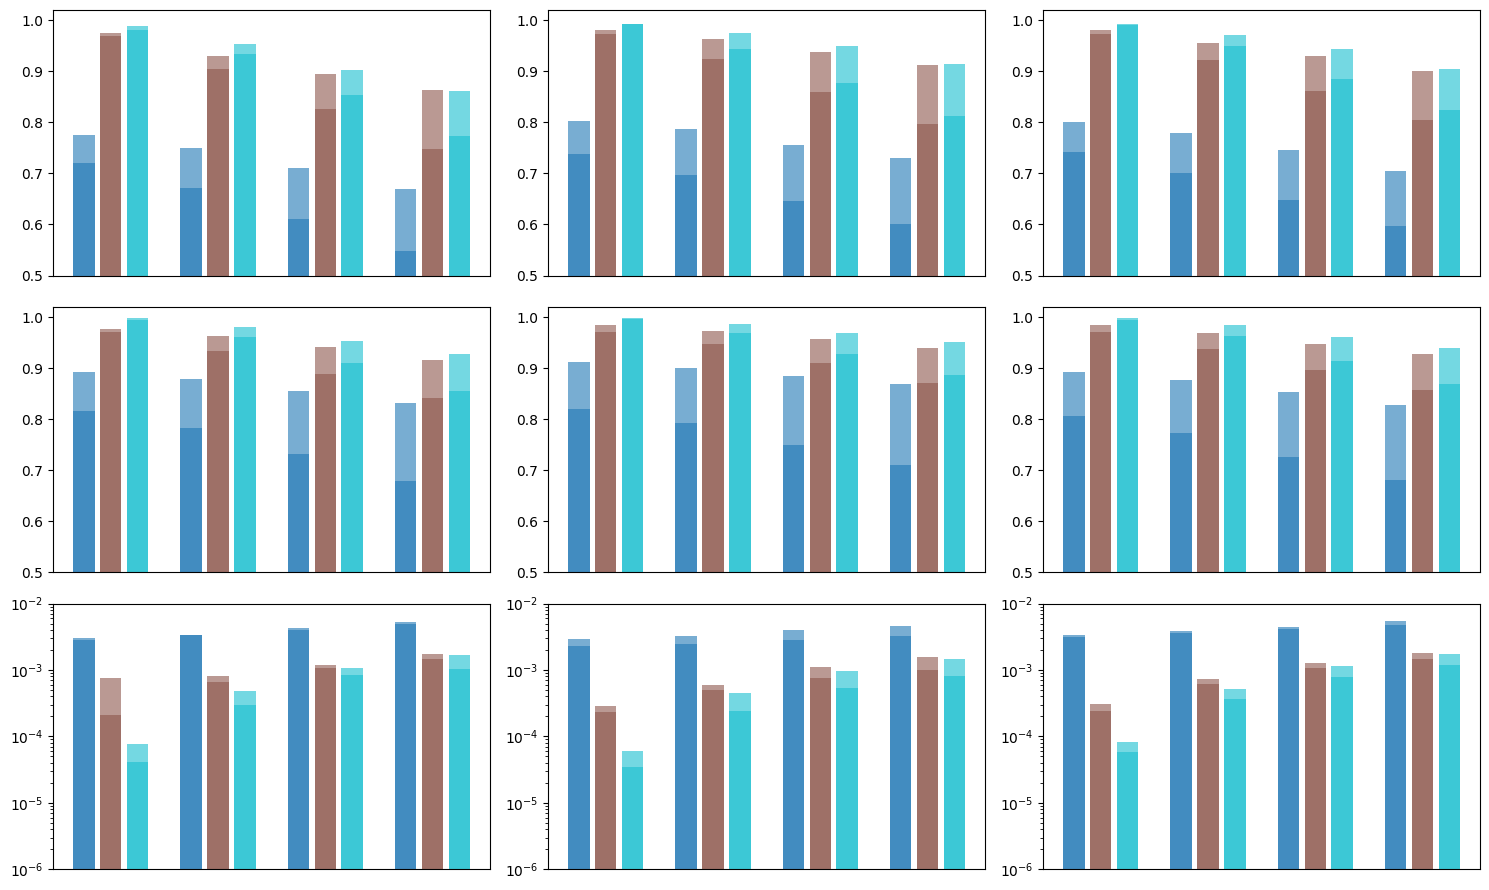

In [122]:
import matplotlib.pyplot as plt

# 假设你已经定义了 get_merge_df 和 plot_comp_bin2cell 函数
bin2cell_source_path = f"./0_bin2cell_results/{patient_id}"
parts = ["part3", "part1", "part2"]
metrics = ["PCC", "SSIM", "MSE"]

# 创建一个 3x3 的子图布局
fig, axes = plt.subplots(3, 3, figsize=(15, 9))

# 遍历 parts 和 metrics
for i, part in enumerate(parts):
    for j, metric in enumerate(metrics):
        # 获取数据
        merge_df = get_merge_df(source_path, bin2cell_source_path, part, metric)
        
        # 在对应的子图上绘制图形
        ax = axes[j, i]
        plot_comp_bin2cell(merge_df, metric, part, ax=ax)

# 调整布局
plt.tight_layout()
plt.savefig("analysis_minor_CF.pdf", dpi=300)
plt.show()

## Segmentation CF as spot size here

### add noise as segmentation error

In [4]:
import os
import shutil
import pandas as pd
import numpy as np
import scanpy as sc
from tqdm import tqdm
from revise.metrics import compute_metric


save_dir = "0_segmentation_results"
sn = "Xenium"
patient_id = "P2CRC"
iteration=0

parts = ["part1", "part2", "part3"]
segs = [1, 2, 3, 4]

def get_portion(seg, panel = 1):
    if panel == 1: # seg
        if seg == 1:
            dropout_portion, swapping_portion = 0.1, 0.05
        elif seg == 2:
            dropout_portion, swapping_portion = 0.2, 0
        elif seg == 3:
            dropout_portion, swapping_portion = 0.0, 0.1
        elif seg == 4:
            dropout_portion, swapping_portion = 0.1, 0.1
    elif panel == 2: # hd
        if seg == 1:
            dropout_portion, swapping_portion = 0.3, 0
        elif seg == 2:
            dropout_portion, swapping_portion = 0.1, 0.05
        elif seg == 3:
            dropout_portion, swapping_portion = 0.05, 0.1
        elif seg == 4:
            dropout_portion, swapping_portion = 0.0, 0.3
    return dropout_portion, swapping_portion


swapping_prob=0.18
# swapping_prob=0.2


for part in tqdm(parts, desc="Part"):
    
    input_dir = f"WSI_{sn}/{patient_id}/cut_{part}/{iteration}"
    sc_path = f"{input_dir}/selected_xenium.h5ad"

    shutil.copy(sc_path, f"WSI_{sn}_seg/{patient_id}/cut_{part}/{iteration}/selected_xenium.h5ad")

    for seg in tqdm(segs, desc="Segmentation"):
        dropout_portion, swapping_portion = get_portion(seg, panel = 1)

        print(f"Segmentation: {seg}, Part: {part}")
        result_dir=f"{save_dir}/{patient_id}/{part}/{iteration}/{seg}_1_1"
        os.makedirs(result_dir, exist_ok=True)
        
        adata_save_dir = f"WSI_{sn}_seg/{patient_id}/cut_{part}/{iteration}/spot_{seg}"
        os.makedirs(adata_save_dir, exist_ok=True)
        
        sc_adata = sc.read(sc_path)
        seg_adata = sc.read(f"{adata_save_dir}/xenium_spot.h5ad")
        
        gene_names = seg_adata.var_names.intersection(sc_adata.var_names)
        sc_list = seg_adata.obs['cell_id'].values
        sc_adata.obs.index = sc_adata.obs['cell_id'].values
        sc_adata = sc_adata[sc_list, gene_names]
        seg_adata = seg_adata[:, gene_names]

        sc.pp.normalize_total(seg_adata, target_sum=1e4)
        sc.pp.normalize_total(sc_adata, target_sum=1e4)
        metrics_df = compute_metric(sc_adata, seg_adata, 
                            adata_process=False, gene_list=None,
                            normalize=True)
        metrics_df.to_csv(f"{result_dir}/seg_metrics.csv")

Part:   0%|          | 0/3 [00:00<?, ?it/s]/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Segmentation: 1, Part: part1


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.7711, 0.9547, 0.1686
SSIM: 0.7941, 0.9752, 0.1562
MSE: 0.0027, 0.0300, 0.0001
NRMSE: 6.3300, 320.3496, 0.7425
Segmentation: 2, Part: part1


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


PCC: 0.7822, 1.0000, 0.4250
SSIM: 0.7819, 1.0000, 0.1109
MSE: 0.0029, 0.0329, 0.0000
NRMSE: 4.0521, 42.3522, 0.0000
Segmentation: 3, Part: part1


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.8024, 0.9776, 0.1192
SSIM: 0.8999, 0.9647, 0.8430
MSE: 0.0015, 0.0079, 0.0000
NRMSE: 7.9264, 421.4608, 0.2552
Segmentation: 4, Part: part1


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part:  33%|███▎      | 1/3 [00:33<01:07, 33.62s/it]

PCC: 0.7104, 0.9477, 0.1719
SSIM: 0.7596, 0.9589, 0.1753
MSE: 0.0031, 0.0306, 0.0001
NRMSE: 7.2793, 257.1678, 0.6038


Segmentation: 1, Part: part2


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.8080, 0.9592, 0.1622
SSIM: 0.7835, 0.9728, 0.1509
MSE: 0.0028, 0.0314, 0.0000
NRMSE: 5.9379, 391.5461, 0.6853
Segmentation: 2, Part: part2


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.7889, 1.0000, 0.2957
SSIM: 0.7697, 1.0000, 0.1822
MSE: 0.0031, 0.0328, 0.0000
NRMSE: 3.8918, 37.0433, 0.0000
Segmentation: 3, Part: part2


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.8468, 0.9750, 0.1012
SSIM: 0.9015, 0.9739, 0.8155
MSE: 0.0012, 0.0092, 0.0001
NRMSE: 7.1159, 569.8149, 0.2567
Segmentation: 4, Part: part2


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part:  67%|██████▋   | 2/3 [01:02<00:31, 31.04s/it]

PCC: 0.7512, 0.9287, 0.1066
SSIM: 0.7525, 0.9578, 0.2209
MSE: 0.0031, 0.0324, 0.0001
NRMSE: 7.4263, 563.9321, 0.7433


Segmentation: 1, Part: part3


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


PCC: 0.7274, 0.9202, 0.1714
SSIM: 0.7349, 0.9622, 0.0830
MSE: 0.0034, 0.0430, 0.0001
NRMSE: 7.0952, 225.4871, 0.8782
Segmentation: 2, Part: part3


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:235: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


PCC: 0.7237, 0.9630, 0.3546
SSIM: 0.7287, 0.9991, 0.0887
MSE: 0.0036, 0.0505, 0.0000
NRMSE: 4.9909, 62.4249, 0.8335
Segmentation: 3, Part: part3


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


PCC: 0.7877, 0.9739, 0.1496
SSIM: 0.9031, 0.9705, 0.8536
MSE: 0.0013, 0.0066, 0.0000
NRMSE: 9.3730, 316.2351, 0.2273
Segmentation: 4, Part: part3


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part: 100%|██████████| 3/3 [01:59<00:00, 39.90s/it]

PCC: 0.6698, 0.9064, 0.1427
SSIM: 0.7076, 0.9567, 0.0678
MSE: 0.0038, 0.0477, 0.0001
NRMSE: 8.7161, 338.1197, 0.8845


In [35]:
adata = sc.read(f"{adata_save_dir}/xenium_spot.h5ad")
adata.obs['total_counts'] = adata.X.sum(axis=1)
a = adata.obs[['total_counts', 'seg_error']]
a

,total_counts,seg_error
aaaadaba-1,253.0,Unchanged
aaaadgga-1,127.0,Unchanged
aaaadmca-1,217.0,Unchanged
aaaaenln-1,165.0,Unchanged
aaaajoff-1,102.0,Unchanged
...,...,...
oglodpfg-1,396.0,Expanding
ogmbjlgf-1,62.0,Unchanged
ogmbpegh-1,59.0,Unchanged
ogmlnfpn-1,74.0,Unchanged


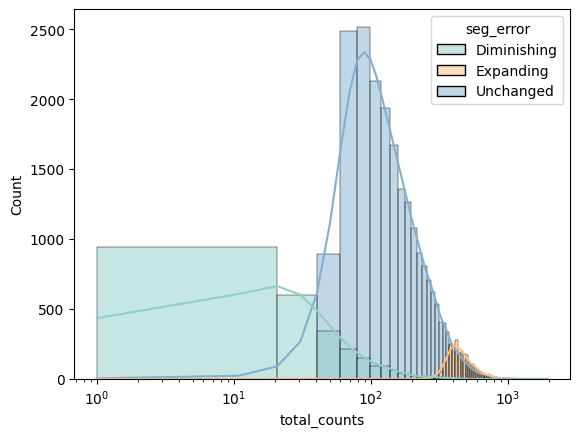

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

palettes = {
    'Diminishing': '#8ECFC9',
    'Expanding': '#FFBE7A',
    'Unchanged': '#82B0D2'
    }
bins=100

sns.histplot(data=a, x='total_counts', hue='seg_error', bins=bins, palette=palettes, kde=True)
plt.xscale('log')
plt.savefig("a.pdf")
plt.show()


In [42]:
adata_save_dir

'WSI_Xenium_seg/P2CRC/cut_part3/0/spot_4'

In [43]:
import scanpy as sc
import pandas as pd
import numpy as np

from revise.svc import get_cell_contributions
from revise.sc_ref import construct_sc_ref, marker_selection, preprocess

st_path = f"{adata_save_dir}/xenium_spot.h5ad"
sc_path = f"{adata_save_dir}/../real_sc_ref.h5ad"
celltype_col = "Level1"

adata_sc_ref = sc.read_h5ad(sc_path)
adata_st = sc.read_h5ad(st_path)

key_type = "clusters"
if key_type not in adata_sc_ref.obs.columns:
    adata_sc_ref.obs[key_type] = adata_sc_ref.obs[celltype_col].astype(str)
type_list = sorted(list(adata_sc_ref.obs[key_type].unique().astype(str)))

adata_sc_ref, adata_st = preprocess(adata_sc_ref, adata_st)
marker_gene_dict = marker_selection(adata_sc_ref, key_type=key_type, return_dict=True, 
                                                          n_select=50, threshold_p=0.1, threshold_fold=1.2,
                                                          q=0.3)
marker_gene = []
marker_gene_label = []
for type_ in type_list:
    marker_gene.extend(marker_gene_dict[type_])

adata_sc_marker = adata_sc_ref[:, marker_gene]
adata_st_marker = adata_st[:, marker_gene]
sc_ref = construct_sc_ref(adata_sc_marker, key_type=key_type, type_list = type_list)

cell_contributions = get_cell_contributions(adata_st_marker, adata_sc_marker, sc_ref, key_type, device="cuda",
                                                cells_on_spot = None, morphology_features = None, feature_list = None,
                                                n_epoch=4000, adam_params=None, batch_prior=2,
                                               )
max_vals = cell_contributions.max(axis=1)
b = pd.DataFrame({
        "Confidence": max_vals,
        "seg_error": adata_st_marker.obs['seg_error'].values,
    })

7it [00:00, 1842.72it/s]
Training: 100%|██████████| 4000/4000 [00:26<00:00, 148.63it/s]


Final recovery rates:
Diminishing Ratio: 0.6303714493809177
Expanding Ratio: 0.9650400582665696
Unchanged Ratio: 0.9865719878009923


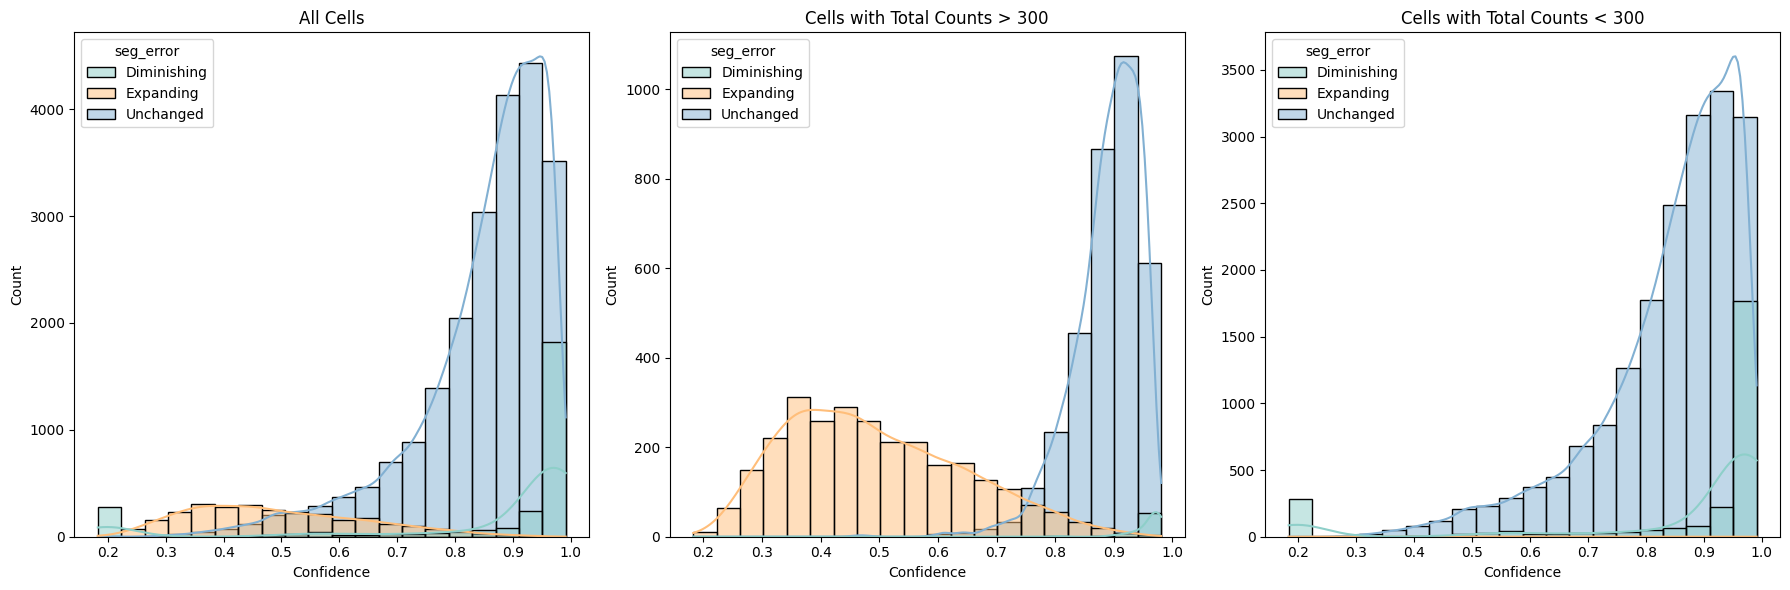

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

b['total_counts'] = adata_st.obs['total_counts']
dropout_total_counts = 50
swapping_total_counts = 300
lower_ts = 0.2
upper_ts = 0.8
c = b[b["total_counts"] > swapping_total_counts]
d = b[b["total_counts"] < swapping_total_counts]

# 计算 Diminishing Ratio
diminishing_condition_1 = (b['total_counts'] < dropout_total_counts) & (b['seg_error'] == "Diminishing")
diminishing_condition_2 = (b['total_counts'] > dropout_total_counts) & (b['Confidence'] < lower_ts)  & (b['seg_error'] == "Diminishing")
diminishing_ratio = (diminishing_condition_1.sum() + diminishing_condition_2.sum()) / (b['seg_error'] == "Diminishing").sum()

# 计算 Expanding Ratio
expanding_condition = (b['total_counts'] > swapping_total_counts) & (b['Confidence'] < upper_ts) & (b['seg_error'] == "Expanding")
expanding_ratio = expanding_condition.sum() / (b['seg_error'] == "Expanding").sum()

# 计算 Unchanged Ratio
unchanged_condition_1 = (b['total_counts'] > swapping_total_counts) & (b['Confidence'] > upper_ts) & (b['seg_error'] == "Unchanged")
unchanged_condition_2 = (b['total_counts'] < swapping_total_counts) & (b['Confidence'] > lower_ts) & (b['seg_error'] == "Unchanged")
unchanged_ratio = (unchanged_condition_1.sum() + unchanged_condition_2.sum()) / (b['seg_error'] == "Unchanged").sum()

# 打印结果
print("Final recovery rates:")
print(f"Diminishing Ratio: {diminishing_ratio}")
print(f"Expanding Ratio: {expanding_ratio}")
print(f"Unchanged Ratio: {unchanged_ratio}")


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

#8ECFC9 RGB:142207201
#FFBE7A RGB:255190122
#FA7F6F RGB:250127111
#82B0D2 RGB:130176210
#BEB8DC RGB:190184220
#E7DAD2 RGB:231218210
#999999
palettes = {
    'Diminishing': '#8ECFC9',
    'Expanding': '#FFBE7A',
    'Unchanged': '#82B0D2'
}
bins=20
sns.histplot(data=b, x='Confidence', hue='seg_error', bins=bins, palette=palettes, kde=True, ax=ax1)
sns.histplot(data=c, x='Confidence', hue='seg_error', bins=bins, palette=palettes, kde=True, ax=ax2)
sns.histplot(data=d, x='Confidence', hue='seg_error', bins=bins, palette=palettes, kde=True, ax=ax3)

ax1.set_title('All Cells')
ax2.set_title(f'Cells with Total Counts > {swapping_total_counts}')
ax3.set_title(f'Cells with Total Counts < {swapping_total_counts}')


plt.tight_layout()
plt.savefig("a.pdf")
plt.show()


In [ ]:
# from revise.minor_CF import replace_effect_spots

adata_st_orig = sc.read(st_path)
no_effect_indices = ( (b['total_counts'] > swapping_total_counts) & (b['Confidence'] > upper_ts) ) | ( (b['total_counts'] < swapping_total_counts) & (b['Confidence'] > lower_ts) )
print(f"no_effect_indices ratio : {no_effect_indices.sum()} / {len(b)}")
adata_st_orig.obs['no_effect'] = no_effect_indices
adata_st_orig.obs['Confidence'] = b['Confidence']

adata_st_orig = replace_effect_spots(adata_st_orig, 
                                    celltype_col="Level1", 
                                    no_effect_col="no_effect",
                                    n_search_neighbors=20, confidence_ts=0.8, n_select_num=10 )

In [97]:
from revise.metrics import compute_metric

adata_sc_orig = sc.read_h5ad(f"{adata_save_dir}/../selected_xenium.h5ad")
sc.pp.normalize_total(adata_sc_orig, target_sum=1e4)
sc.pp.normalize_total(adata_st_orig, target_sum=1e4)
metrics_df = compute_metric(adata_sc_orig, adata_st_orig, 
                                adata_process=False, gene_list=None,
                                normalize=True)

PCC: 0.7670, 0.9291, 0.3593
SSIM: 0.7581, 0.9816, 0.0685
MSE: 0.0032, 0.0472, 0.0000
NRMSE: 5.4477, 130.2502, 0.7974


In [12]:
import pandas as pd
from tqdm import tqdm

def get_merge_df(source_path, seg_source_path, part, metric):
    iteration = 0
    spot_sizes = [1, 2, 3, 4]

    merge_df = pd.DataFrame()
    for spot_size in tqdm(spot_sizes, desc="spot_sizes"):  
        sc_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sc_metrics_normalized.csv"
        sp_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sp_metrics_normalized.csv"
        seg_metric_file = f"{seg_source_path}/{part}/{iteration}/{spot_size}_1_1/seg_metrics.csv"

        try:
            sp_metric = pd.read_csv(sp_metric_file, index_col=0)
            df_sp = pd.DataFrame([sp_metric[metric].mean()], columns=["Value"])
            df_sp['Method'] = "sp-SVC"
        except FileNotFoundError:
            print(f"sp File not found: {sp_metric_file}")
            df_sp = pd.DataFrame()

        try:
            sc_metric = pd.read_csv(sc_metric_file, index_col=0)
            df_sc = pd.DataFrame([sc_metric[metric].mean()], columns=["Value"])
            df_sc['Method'] = "sc-SVC"
        except FileNotFoundError:
            print(f"sc File not found: {sc_metric_file}")
            df_sc = pd.DataFrame()


        try:
            seg_metric = pd.read_csv(seg_metric_file, index_col=0)
            df_bin2cell = pd.DataFrame([seg_metric[metric].mean()], columns=["Value"])
            df_bin2cell['Method'] = "segmentation"
        except FileNotFoundError:
            print(f"seg File not found: {seg_metric_file}")
            df_bin2cell = pd.DataFrame()
        

        df = pd.concat([df_bin2cell, df_sc, df_sp])
        df['Iteration'] = iteration
        df['Spot_size'] = spot_size
        df['Part'] = part
        df['Metric'] = metric
        
        merge_df = pd.concat([merge_df, df])
    merge_df.reset_index(drop=True, inplace=True)
    return merge_df

import matplotlib.pyplot as plt
def plot_comp_seg(merge_df, metric, part, ax):
    unique_spot_sizes = merge_df['Spot_size'].unique()
    unique_methods = ["segmentation", "sc-SVC", "sp-SVC"]

    # 为每个 Method 分配一个颜色
    cmap = plt.cm.get_cmap('tab10', len(unique_methods))
    method_colors = {method: cmap(i) for i, method in enumerate(unique_methods)}

    # 按 Spot_size 和 Method 排序
    merge_df = merge_df.sort_values(by=['Spot_size', 'Method'])

    # 计算每个 Spot_size 的位置
    spot_size_positions = np.arange(len(unique_spot_sizes)) * (len(unique_methods) + 1)

    # 绘制柱状图
    for i, spot_size in enumerate(unique_spot_sizes):
        for j, method in enumerate(unique_methods):
            subset = merge_df[(merge_df['Spot_size'] == spot_size) & (merge_df['Method'] == method)]
            if not subset.empty:
                x_positions = [spot_size_positions[i] + j] * len(subset)
                # 根据 Iteration 调整颜色的透明度
                colors = [method_colors[method]] * len(subset)
                for x, value, color in zip(x_positions, subset['Value'], colors):
                    bottom = 0.5 if metric in ["PCC", "SSIM"] else 1e-4
                    ax.bar(x, value - bottom, color=color, bottom = bottom)

    # # 设置横轴刻度和标签
    # ax.set_xticks(spot_size_positions)
    # ax.set_xticklabels(unique_spot_sizes)
    ax.xaxis.set_visible(False)

    # # 设置标题和标签
    # ax.set_title(f'{part}')
    # ax.set_ylabel(metric)

    # 设置 Y 轴为对数刻

    # 设置 Y 轴范围
    if metric == "PCC":
        ax.set_ylim(0.5, 1.02)
    elif metric == "SSIM":
        ax.set_ylim(0.5, 1.02)
    elif metric == "MSE":
        ax.set_ylim(1e-4, 1e-2)
        ax.set_yscale('log')
    

In [9]:
# error bar
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_merge_df(source_path, seg_source_path, part, metric):
    iteration = 0
    spot_sizes = [1, 2, 3, 4]

    merge_df = pd.DataFrame()
    for spot_size in tqdm(spot_sizes, desc="spot_sizes"):  
        sc_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sc_metrics_normalized.csv"
        sp_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sp_metrics_normalized.csv"
        seg_metric_file = f"{seg_source_path}/{part}/{iteration}/{spot_size}_1_1/seg_metrics.csv"

        try:
            sp_metric = pd.read_csv(sp_metric_file, index_col=0)
            df_sp = pd.DataFrame({
                "Value": [sp_metric[metric].mean()],
                "SEM": [sp_metric[metric].sem()]  # Calculate standard error of the mean
            })
            df_sp['Method'] = "sp-SVC"
        except FileNotFoundError:
            print(f"sp File not found: {sp_metric_file}")
            df_sp = pd.DataFrame()

        try:
            sc_metric = pd.read_csv(sc_metric_file, index_col=0)
            df_sc = pd.DataFrame({
                "Value": [sc_metric[metric].mean()],
                "SEM": [sc_metric[metric].sem()]
            })
            df_sc['Method'] = "sc-SVC"
        except FileNotFoundError:
            print(f"sc File not found: {sc_metric_file}")
            df_sc = pd.DataFrame()

        try:
            seg_metric = pd.read_csv(seg_metric_file, index_col=0)
            df_bin2cell = pd.DataFrame({
                "Value": [seg_metric[metric].mean()],
                "SEM": [seg_metric[metric].sem()]
            })
            df_bin2cell['Method'] = "segmentation"
        except FileNotFoundError:
            print(f"seg File not found: {seg_metric_file}")
            df_bin2cell = pd.DataFrame()
        
        df = pd.concat([df_bin2cell, df_sc, df_sp])
        df['Iteration'] = iteration
        df['Spot_size'] = spot_size
        df['Part'] = part
        df['Metric'] = metric
        
        merge_df = pd.concat([merge_df, df])
    merge_df.reset_index(drop=True, inplace=True)
    return merge_df

def plot_comp_seg(merge_df, metric, part, ax):
    unique_spot_sizes = merge_df['Spot_size'].unique()
    unique_methods = ["segmentation", "sc-SVC", "sp-SVC"]

    # 为每个 Method 分配一个颜色
    cmap = plt.cm.get_cmap('tab10', len(unique_methods))
    method_colors = {method: cmap(i) for i, method in enumerate(unique_methods)}

    # 按 Spot_size 和 Method 排序
    merge_df = merge_df.sort_values(by=['Spot_size', 'Method'])

    # 计算每个 Spot_size 的位置
    bar_width = 0.25  # Width of each bar
    spot_size_positions = np.arange(len(unique_spot_sizes)) * (len(unique_methods) * bar_width + 0.2)

    # 绘制柱状图并添加误差线
    for i, spot_size in enumerate(unique_spot_sizes):
        for j, method in enumerate(unique_methods):
            subset = merge_df[(merge_df['Spot_size'] == spot_size) & (merge_df['Method'] == method)]
            if not subset.empty:
                x_position = spot_size_positions[i] + j * bar_width
                bottom = 0.5 if metric in ["PCC", "SSIM"] else 1e-4
                value = subset['Value'].iloc[0] - bottom
                sem = subset['SEM'].iloc[0]
                ax.bar(x_position, value, yerr=sem, color=method_colors[method], 
                       bottom=bottom, width=bar_width, capsize=3, error_kw={'ecolor': 'black'})

    # # 设置横轴刻度和标签
    # ax.set_xticks(spot_size_positions + bar_width * (len(unique_methods) - 1) / 2)
    # ax.set_xticklabels(unique_spot_sizes)
    ax.xaxis.set_visible(False)

    # # 设置标题和标签
    # ax.set_title(f'{part}')
    # ax.set_ylabel(metric)

    # 设置 Y 轴范围和刻度
    if metric == "PCC":
        ax.set_ylim(0.5, 1.02)
    elif metric == "SSIM":
        ax.set_ylim(0.5, 1.02)
    elif metric == "MSE":
        ax.set_ylim(1e-4, 1e-2)
        ax.set_yscale('log')

spot_sizes: 100%|██████████| 4/4 [00:00<00:00, 223.30it/s]
/tmp/ipykernel_3432950/1559976927.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
spot_sizes: 100%|██████████| 4/4 [00:00<00:00, 235.06it/s]


/tmp/ipykernel_3432950/1559976927.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
spot_sizes: 100%|██████████| 4/4 [00:00<00:00, 236.87it/s]
/tmp/ipykernel_3432950/1559976927.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
spot_sizes: 100%|██████████| 4/4 [00:00<00:00, 236.37it/s]
/tmp/ipykernel_3432950/1559976927.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instea

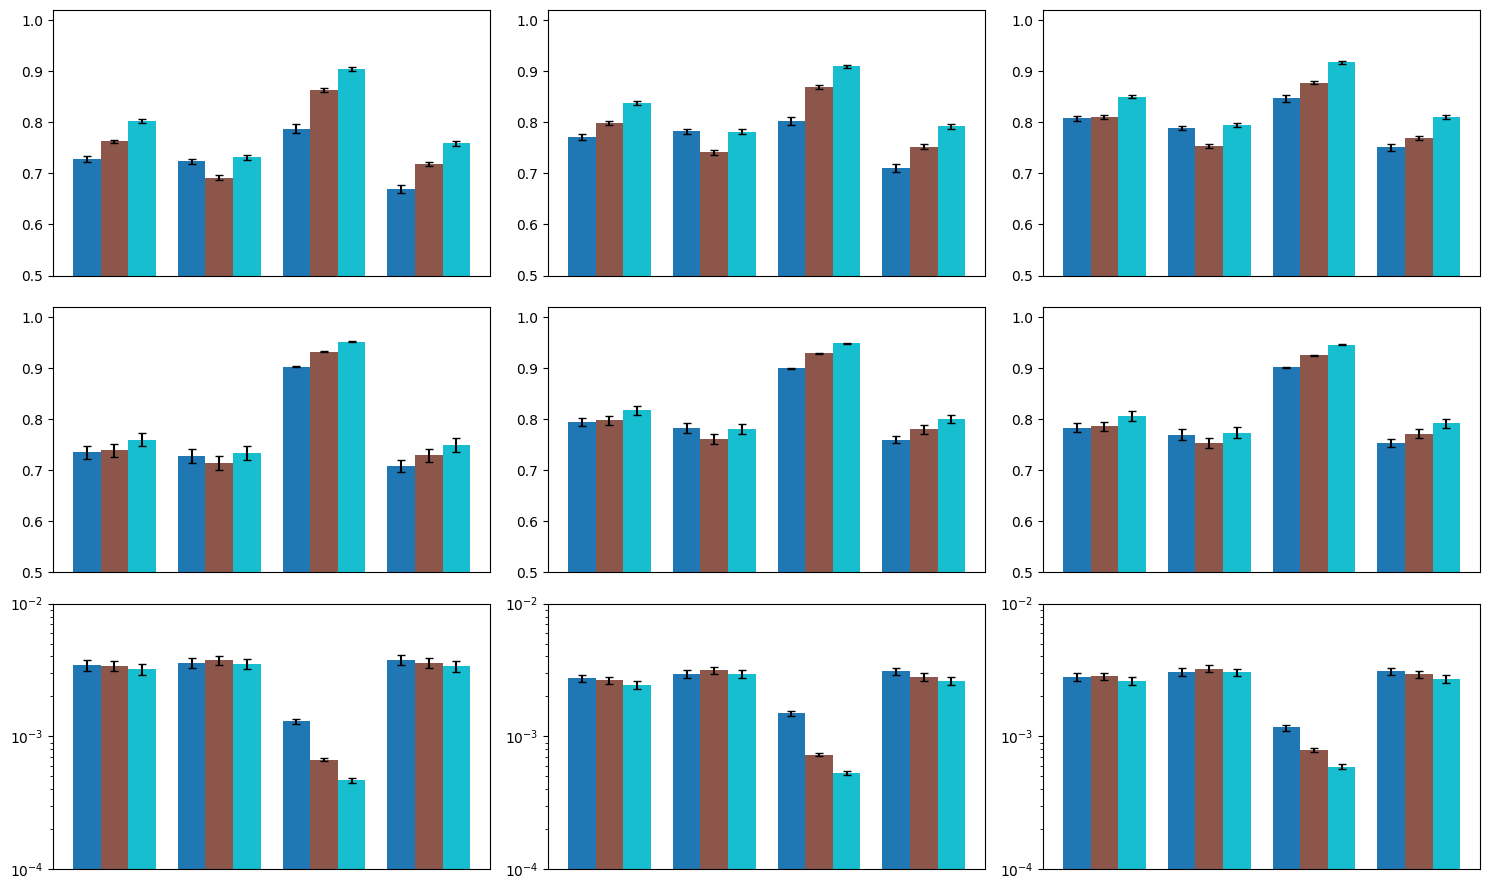

In [10]:
import matplotlib.pyplot as plt

# 假设你已经定义了 get_merge_df 和 plot_comp_bin2cell 函数
source_path = "/home/wys/Sim2Real-ST/REVISE/0_revise_results_s/P2CRC"
source_path = "/home/wys/Sim2Real-ST/REVISE/0_segmentation_results/P2CRC"
seg_source_path = "/home/wys/Sim2Real-ST/REVISE/0_segmentation_results/P2CRC"

parts = ["part3", "part1", "part2"]
metrics = ["PCC", "SSIM", "MSE"]

# 创建一个 3x3 的子图布局
fig, axes = plt.subplots(3, 3, figsize=(15, 9))

# 遍历 parts 和 metrics
for i, part in enumerate(parts):
    for j, metric in enumerate(metrics):
        # 获取数据
        merge_df = get_merge_df(source_path, seg_source_path, part, metric)
        
        # 在对应的子图上绘制图形
        ax = axes[j, i]
        plot_comp_seg(merge_df, metric, part, ax=ax)

# 调整布局
plt.tight_layout()
plt.savefig("analysis_minor_CF_seg.pdf", dpi=300)
plt.show()

## 8um bin

In [8]:
import os
import shutil
import pandas as pd
import numpy as np
import scanpy as sc
from tqdm import tqdm
from revise.metrics import compute_metric


save_dir = "0_segmentation_results"
sn = "Xenium"
patient_id = "P2CRC"
iteration=0

parts = ["part1", "part2", "part3"]
segs = [8]

swapping_prob=0.3


for part in tqdm(parts, desc="Part"):
    
    input_dir = f"WSI_{sn}/{patient_id}/cut_{part}/{iteration}"
    sc_path = f"{input_dir}/selected_xenium.h5ad"

    shutil.copy(sc_path, f"WSI_{sn}_seg/{patient_id}/cut_{part}/{iteration}/selected_xenium.h5ad")

    for seg in tqdm(segs, desc="Segmentation"):
        dropout_portion, swapping_portion = 0.1, 0.1

        print(f"Segmentation: {seg}, Part: {part}")
        result_dir=f"{save_dir}/{patient_id}/{part}/{iteration}/{seg}_1_1"
        os.makedirs(result_dir, exist_ok=True)
        
        adata_save_dir = f"WSI_{sn}_seg/{patient_id}/cut_{part}/{iteration}/spot_{seg}"
        os.makedirs(adata_save_dir, exist_ok=True)
        
        sc_adata = sc.read(sc_path)
        seg_adata = sc.read(f"{adata_save_dir}/xenium_spot.h5ad")
        
        gene_names = seg_adata.var_names.intersection(sc_adata.var_names)
        sc_list = seg_adata.obs['cell_id'].values
        sc_adata.obs.index = sc_adata.obs['cell_id'].values
        sc_adata = sc_adata[sc_list, gene_names]
        seg_adata = seg_adata[:, gene_names]

        sc.pp.normalize_total(seg_adata, target_sum=1e4)
        sc.pp.normalize_total(sc_adata, target_sum=1e4)
        metrics_df = compute_metric(sc_adata, seg_adata, 
                            adata_process=False, gene_list=None,
                            normalize=True)
        metrics_df.to_csv(f"{result_dir}/seg_metrics.csv")

Part:   0%|          | 0/3 [00:00<?, ?it/s]/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


Segmentation: 8, Part: part1


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part:  33%|███▎      | 1/3 [00:08<00:16,  8.43s/it]

PCC: 0.7254, 0.9434, 0.1952
SSIM: 0.7367, 0.9615, 0.1730
MSE: 0.0030, 0.0307, 0.0001
NRMSE: 6.7378, 221.8358, 0.6389


Segmentation: 8, Part: part2


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part:  67%|██████▋   | 2/3 [00:15<00:07,  7.78s/it]

PCC: 0.7639, 0.9304, 0.1241
SSIM: 0.7334, 0.9587, 0.2220
MSE: 0.0030, 0.0326, 0.0001
NRMSE: 6.9929, 556.9588, 0.7485


Segmentation: 8, Part: part3


/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/home/wys/miniconda3/envs/python3.10/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:208: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
Part: 100%|██████████| 3/3 [00:29<00:00, 10.00s/it]

PCC: 0.6828, 0.9013, 0.1546
SSIM: 0.6891, 0.9579, 0.0676
MSE: 0.0037, 0.0479, 0.0001
NRMSE: 8.1136, 296.2344, 0.8886


In [ ]:
ax.xaxis.set_visible(False)

spot_sizes: 100%|██████████| 1/1 [00:00<00:00, 233.46it/s]
/tmp/ipykernel_3553173/697448283.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
spot_sizes: 100%|██████████| 1/1 [00:00<00:00, 228.14it/s]
/tmp/ipykernel_3553173/697448283.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(unique_methods))
spot_sizes: 100%|██████████| 1/1 [00:00<00:00, 234.63it/s]
/tmp/ipykernel_3553173/697448283.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[n

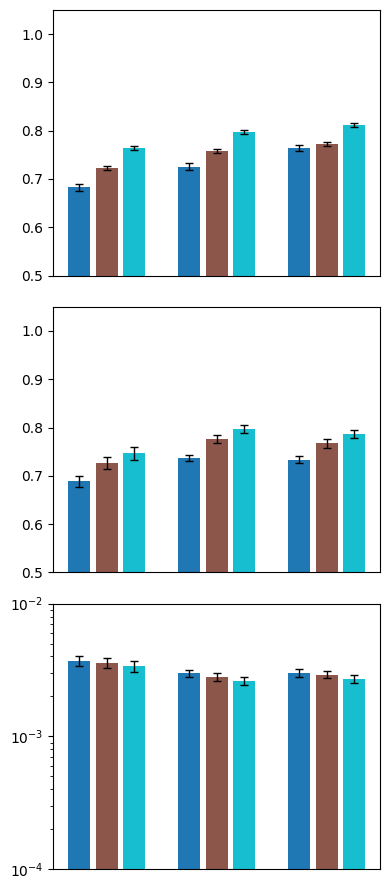

In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

def get_merge_df(source_path, seg_source_path, part, metric):
    iteration = 0
    spot_sizes = [8]

    merge_df = pd.DataFrame()
    for spot_size in tqdm(spot_sizes, desc="spot_sizes"):  
        sc_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sc_metrics_normalized.csv"
        sp_metric_file = f"{source_path}/{part}/{iteration}/{spot_size}_1_1/sp_metrics_normalized.csv"
        seg_metric_file = f"{seg_source_path}/{part}/{iteration}/{spot_size}_1_1/seg_metrics.csv"

        try:
            sp_metric = pd.read_csv(sp_metric_file, index_col=0)
            df_sp = pd.DataFrame({
                "Value": [sp_metric[metric].mean()],
                "SEM": [sp_metric[metric].sem()]
            })
            df_sp['Method'] = "sp-SVC"
        except FileNotFoundError:
            print(f"sp File not found: {sp_metric_file}")
            df_sp = pd.DataFrame()

        try:
            sc_metric = pd.read_csv(sc_metric_file, index_col=0)
            df_sc = pd.DataFrame({
                "Value": [sc_metric[metric].mean()],
                "SEM": [sc_metric[metric].sem()]
            })
            df_sc['Method'] = "sc-SVC"
        except FileNotFoundError:
            print(f"sc File not found: {sc_metric_file}")
            df_sc = pd.DataFrame()

        try:
            seg_metric = pd.read_csv(seg_metric_file, index_col=0)
            df_bin2cell = pd.DataFrame({
                "Value": [seg_metric[metric].mean()],
                "SEM": [seg_metric[metric].sem()]
            })
            df_bin2cell['Method'] = "segmentation"
        except FileNotFoundError:
            print(f"seg File not found: {seg_metric_file}")
            df_bin2cell = pd.DataFrame()
        
        df = pd.concat([df_bin2cell, df_sc, df_sp])
        df['Iteration'] = iteration
        df['Spot_size'] = spot_size
        df['Part'] = part
        df['Metric'] = metric
        
        merge_df = pd.concat([merge_df, df])
    merge_df.reset_index(drop=True, inplace=True)
    return merge_df

def plot_comp_seg(merge_df, metric, parts, ax):
    unique_methods = ["segmentation", "sc-SVC", "sp-SVC"]

    # 为每个 Method 分配一个颜色
    cmap = plt.cm.get_cmap('tab10', len(unique_methods))
    method_colors = {method: cmap(i) for i, method in enumerate(unique_methods)}

    # 按 Part 和 Method 排序
    merge_df = merge_df.sort_values(by=['Part', 'Method'])

    # 计算每个 Part 的位置
    part_positions = np.arange(len(parts)) * (len(unique_methods) + 1)

    # 绘制柱状图和误差线
    for i, part in enumerate(parts):
        for j, method in enumerate(unique_methods):
            subset = merge_df[(merge_df['Part'] == part) & (merge_df['Method'] == method)]
            if not subset.empty:
                x_position = part_positions[i] + j
                value = subset['Value'].iloc[0]
                sem = subset['SEM'].iloc[0]
                color = method_colors[method]
                bottom = 0.5 if metric in ["PCC", "SSIM"] else 1e-4
                ax.bar(x_position, value - bottom, color=color, bottom=bottom)
                # Plot error bars at the actual value (not offset by bottom)
                ax.errorbar(x_position, value, yerr=sem, fmt='none', 
                           ecolor='black', capsize=3, elinewidth=1, capthick=1)

    ax.xaxis.set_visible(False)

    # 设置 Y 轴范围，增加一些空间以确保误差线可见
    if metric == "PCC":
        ax.set_ylim(0.5, 1.05)
    elif metric == "SSIM":
        ax.set_ylim(0.5, 1.05)
    elif metric == "MSE":
        ax.set_ylim(1e-4, 1e-2)
        ax.set_yscale('log')

# 路径和参数
source_path = "/home/wys/Sim2Real-ST/REVISE/0_segmentation_results/P2CRC"
seg_source_path = "/home/wys/Sim2Real-ST/REVISE/0_segmentation_results/P2CRC"

parts = ["part3", "part1", "part2"]
metrics = ["PCC", "SSIM", "MSE"]

# 创建一个 1x3 的子图布局
fig, axes = plt.subplots(3, 1, figsize=(4, 9))

# 遍历 metrics
for j, metric in enumerate(metrics):
    # 获取所有 parts 的数据
    merge_df = pd.DataFrame()
    for part in parts:
        df = get_merge_df(source_path, seg_source_path, part, metric)
        merge_df = pd.concat([merge_df, df])
    
    # 在对应的子图上绘制图形
    ax = axes[j]
    plot_comp_seg(merge_df, metric, parts, ax=ax)

# 调整布局
plt.tight_layout()
plt.savefig("analysis_minor_CF_bin8.pdf", dpi=300)
plt.show()